In [224]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import numpy as np

# input the folder path
folder_path = '/Users/yukiharuta/Desktop/Temp-Data/MAPbBr3-Paper/02_XRD/0_TEMPORAL'
csv_list = glob.glob(f'{folder_path}/*.csv')
csv_list.sort()

name_list, df_list = [], []
for i in range(len(csv_list)):
    csv = csv_list[i]
    name = os.path.basename(csv)
    rows = 0
    while True:
        try:
            df = pd.read_csv(csv,skiprows=rows)
            x = df['Angle'].to_list()
            break
        except:
            rows += 1
        if rows == 1000:
            break
    name_list.append(name)
    df_list.append(df)
    print(f'{i}: {name}')

0: 230925_D_0.3_BB_gonio.csv
1: 230925_D_0.3_monochro-2theta_200.csv
2: 230925_D_0.3_monochro-2theta_400.csv
3: 231010_AY4_0.2_BB_gonio.csv
4: 231010_AY4_0.2_monochro-2theta_200.csv
5: 231010_AY4_0.2_monochro-2theta_400.csv



4: 231010_AY4_0.2_monochro-2theta_200.csv
max intensity 6999.0


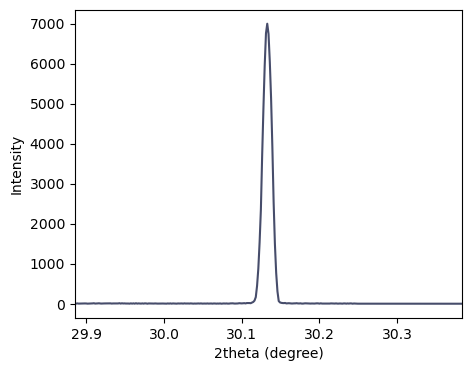

In [225]:
plot_id = [4]
# plot_id = np.arange(0,len(df_list),1) # in case you plot all csv files
# plot the fitted function and the data
fig = plt.figure(figsize=(5,4))
for plot in plot_id:
    print(f'\n{plot}: {name_list[plot]}')
    x = df_list[plot]['Angle'].to_list()
    y = df_list[plot][' Intensity'].to_list()
    I0 = max(y)
    print(f'max intensity {I0}')
    plt.plot(x, y, c='#474D6B')
    # plt.legend(frameon=False)
    plt.xlabel('2theta (degree)')
    plt.ylabel('Intensity')
    # plt.yscale('log')
    x_range = [min(x),max(x)]
    plt.xlim(x_range)
    plt.show()

# define back ground function
def remove_bkg(x,y):
    slope, intercept = np.polyfit([x[0],x[-1]],[y[0],y[-1]],1)
    y_removed_baseline = []
    for i in range(len(x)):
        x_i = x[i]
        y_bkg = slope * x_i + intercept
        if y[i]-y_bkg<1:
            y_removed_baseline.append(1)
        else:
            y_removed_baseline.append(y[i]-y_bkg)
    return y_removed_baseline

# y = remove_bkg(x,y)
# # plot the fitted function and the data
# fig = plt.figure(figsize=(5,4))
# plt.plot(x, y, c='#474D6B')
# # plt.legend(frameon=False)
# plt.xlabel('2theta (degree)')
# plt.ylabel('Intensity')
# plt.yscale('log')
# x_range = [min(x),max(x)]
# plt.xlim(x_range)
# plt.show()

(29.88492064, 30.38387138)

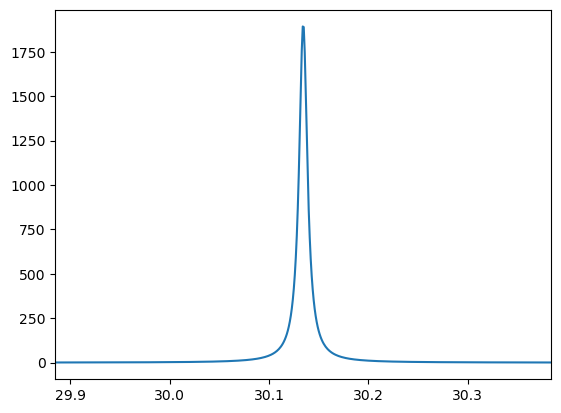

In [226]:
from scipy.optimize import curve_fit
from scipy.special import wofz, gamma
from sklearn.metrics import r2_score

# define the PearsonVII function for the fitting of rocking curves
# https://www.originlab.com/doc/Origin-Help/PearsonVII-FitFunc
def PearsonVII(x, xc, y0, A, mu, w):
    y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
    return y

X = np.arange(x_range[0],x_range[1],0.001)
Y = PearsonVII(X, xc=sum(x_range)/2, y0=0,A=30,mu=1,w=0.01)
plt.plot(X,Y)
plt.xlim(x_range[0],x_range[1])

/var/folders/n_/_z_q62kx279gp1tfsgqh78s40000gn/T/ipykernel_19451/3559404872.py:16: RuntimeWarning: invalid value encountered in sqrt
  y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
/var/folders/n_/_z_q62kx279gp1tfsgqh78s40000gn/T/ipykernel_19451/3559404872.py:16: RuntimeWarning: invalid value encountered in power
  y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
/var/folders/n_/_z_q62kx279gp1tfsgqh78s40000gn/T/ipykernel_19451/3559404872.py:16: RuntimeWarning: invalid value encountered in double_scalars
  y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
/var/folders/n_/_z_q62kx279gp1tfsgqh78s40000gn/T/ipykernel_19451/3559404872.py:16: RuntimeWarning: overflow encountered in double_scalars
  y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/m

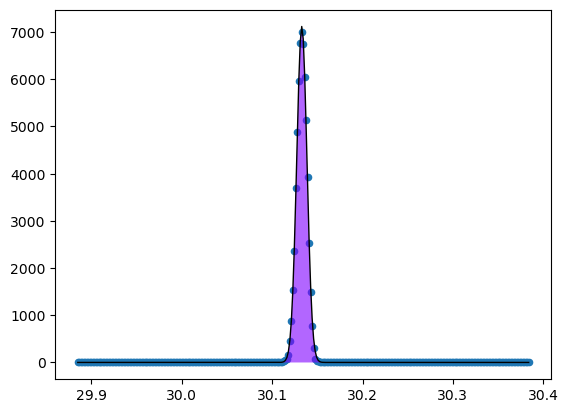

P1: x0= 30.1328, FWHM = 0.0133
[3.01328456e+01 1.01008551e+02 1.71127296e+02 1.33131373e-02]


In [227]:
from scipy.optimize import curve_fit
from scipy.special import wofz, gamma
from sklearn.metrics import r2_score

#バックグラウンドの初期値
background = 1
#初期値のリストを作成
guess = []
guess.append([34.55, 30, 1, 0.01]) # Ka1
# guess.append([62.8, 150, 1, 0.01]) # Ka2
# guess.append([62.3, 15, 1, 0.01]) # Kb

# define the PearsonVII function for the fitting of rocking curves
# https://www.originlab.com/doc/Origin-Help/PearsonVII-FitFunc
def PearsonVII(x, xc, y0, A, mu, w):
    y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
    return y

def func(x, *params):
    num_func = int(len(params)/4)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(4*i,4*(i+1),1))
        xc = params[int(param_range[0])]
        A = params[int(param_range[1])]
        mu = params[int(param_range[2])]
        w = params[int(param_range[3])]
        y = PearsonVII(x, xc, background, A, mu, w)
        y_list.append(y)
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i
    # y_sum = y_sum + params[-1]

    return y_sum

def fit_plot(x, *params):
    num_func = int(len(params)/4)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(4*i,4*(i+1),1))
        xc = params[int(param_range[0])]
        A = params[int(param_range[1])]
        mu = params[int(param_range[2])]
        w = params[int(param_range[3])]
        y = PearsonVII(x, xc, background, A, mu, w)
        y_list.append(y)
    return y_list

#初期値リストの結合
guess_total = []
for i in guess:
    guess_total.extend(i)
# guess_total.append(background)

popt, pcov = curve_fit(func, x, y, p0=guess_total)

fit = func(x, *popt)
plt.scatter(x, y, s=20)
plt.plot(x, fit , ls='-', c='black', lw=1)

y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)
    
# plt.xlim(x_range[0],x_range[1])
# plt.xlim(62.5,62.9)
# plt.yscale('log')
plt.show()

xc1 = popt[0] #position of the Ka1 peak
w1 = popt[3] # FWHM of the Ka1 peak
# xc2 = popt[4]
# w2 = popt[7]

x_fit = np.arange(min(x),max(x)+0.001,0.001)
y_fit_list = fit_plot(x_fit, *popt)

# y_overlap = []
# for i in range(len(x_fit)):
#     if y_fit_list[0][i] >= y_fit_list[1][i]:
#         y_overlap.append(y_fit_list[1][i])
#     else:
#         y_overlap.append(y_fit_list[0][i])

# Area of the Ka1 peak
if xc1 >= xc2:
    Area_1 = sum(y_fit_list[1])*0.001
else:
    Area_1 = sum(y_fit_list[0])*0.001
# Area of the overlap
Area = sum(y_overlap)*0.001

# print(f'P1: x0= {xc1:.4f}, FWHM = {w1:.4f}, P2: x0= {xc2:.4f}, FWHM = {w2:.4f}, Overlap: {Area/Area_1*100:.2f}%')
print(f'P1: x0= {xc1:.4f}, FWHM = {w1:.4f}')
print(popt)


In [193]:
0.0134*3600

48.24